In [ ]:
using PerlaTonettiWaugh, Plots, BenchmarkTools

In [ ]:
z_min = 0.0 
z_max = 5.0
M = 1000
z_grid = range(z_min, stop = z_max, length = M) # Since we only care about the grid. 

# Time
tstops_min_Δ_val = 1e-3 # minimum distance between tstops to be used for DE solvers.
# Define common objects. 
d_0 = 5
d_T = 2.3701
params = (ρ = 0.02, σ = 4.2508, N = 10, θ = 5.1269, γ = 1.00, κ = 0.013, ζ = 1, η = 0, Theta = 1, χ = 1/(2.1868), υ = 0.0593, μ = 0, δ = 0.053, d = 2.3701) # Baselines per Jesse. 
stationary_sol = stationary_numerical(params, z_grid) # solution at t = T
println("g = $(stationary_sol.g), z_hat = $(stationary_sol.z_hat), Ω = $(stationary_sol.Ω)")

In [ ]:
T = 5.0
settings = (z = z_grid, tstops = 0:T, Δ_E = 1e-4)
Ω(t) = stationary_sol.Ω
stationary_sol.Ω
Δ_E = 1e-4
E(t) = (log(Ω(t+Δ_E)) - log(Ω(t-Δ_E)))/(2*Δ_E) + params.δ
p = PerlaTonettiWaugh.get_p(params, stationary_sol, settings, Ω, T)
dae = PerlaTonettiWaugh.PTW_DAEProblem(params, stationary_sol, settings, E, Ω, T, p);

In [21]:
#Testing the f!
du = zeros(M)
u = [stationary_sol.v_tilde; stationary_sol.g; stationary_sol.z_hat]
resid = similar(u)
du = zeros(M+2)
t = 0.0
@btime dae.f!($resid,$du,$u,$p,$t)

  140.831 μs (138 allocations: 228.75 KiB)


1000-element view(::Array{Float64,1}, 1:1000) with eltype Float64:
 -9.016777602344206e-11 
 -9.016067059608446e-11 
 -9.0108712158532e-11   
 -9.012425528087675e-11 
 -9.013580160033285e-11 
 -9.011714985351915e-11 
 -9.015534152556626e-11 
 -9.012958435139495e-11 
 -9.015001245504806e-11 
 -9.013646773414763e-11 
 -9.011559554128468e-11 
 -9.012669777153093e-11 
 -9.014135271545598e-11 
  ⋮                     
 -1.3921148955819973e-10
 -1.392155002388762e-10 
 -1.3922039909797235e-10
 -1.3920428698632747e-10
 -1.3921387653770267e-10
 -1.392089638008187e-10 
 -1.3921823416307433e-10
 -1.392134046929172e-10 
 -1.3921583330578358e-10
 -1.3920969932357252e-10
 -1.3921971908636976e-10
 -1.3921680475093012e-10

In [22]:
resid

1002-element Array{Float64,1}:
 -9.016777602344206e-11 
 -9.016067059608446e-11 
 -9.0108712158532e-11   
 -9.012425528087675e-11 
 -9.013580160033285e-11 
 -9.011714985351915e-11 
 -9.015534152556626e-11 
 -9.012958435139495e-11 
 -9.015001245504806e-11 
 -9.013646773414763e-11 
 -9.011559554128468e-11 
 -9.012669777153093e-11 
 -9.014135271545598e-11 
  ⋮                     
 -1.3922039909797235e-10
 -1.3920428698632747e-10
 -1.3921387653770267e-10
 -1.392089638008187e-10 
 -1.3921823416307433e-10
 -1.392134046929172e-10 
 -1.3921583330578358e-10
 -1.3920969932357252e-10
 -1.3921971908636976e-10
 -1.3921680475093012e-10
 -2.7400304247748863e-13
  4.208980275421936e-9  

Now let's solve the problem and draw the plots!

In [23]:
# solve for stationary solution at t = 0
params_0 = merge(params, (d = d_0,)) # parameters to be used at t = 0
params_T = merge(params, (d = d_T,)) # parameters to be used at t = T

stationary_sol_0 = stationary_numerical(params_0, z_grid) # solution at t = 0
Ω_0 = stationary_sol_0.Ω

# get settings
settings = (z = z_grid, tstops = 0:1e-3:T, Δ_E = 1e-04)

# solve the dynamics!
solved = solve_dynamics(params_T, stationary_sol, settings, T, Ω)

# save v0 and v_hat_t0
v_hat_t0 = map(z -> exp((params.σ-1)*z), z_grid) .* solved.v[1]
v0 = map(v -> v[1], solved.v)

12-element Array{Float64,1}:
 1.186800000000357 
 1.1868000000005012
 1.1867999997951968
 1.1867999994572798
 1.1867999986694893
 1.1867999971680057
 1.1867999944197083
 1.1867999897520574
 1.1867999828279834
 1.1867999747258287
 1.1867999685409587
 1.1867999673073664

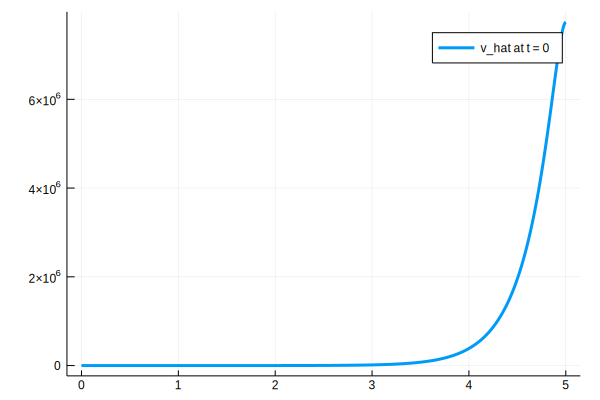

In [24]:
plot(z_grid, v_hat_t0, label = "v_hat at t = 0", lw = 3)

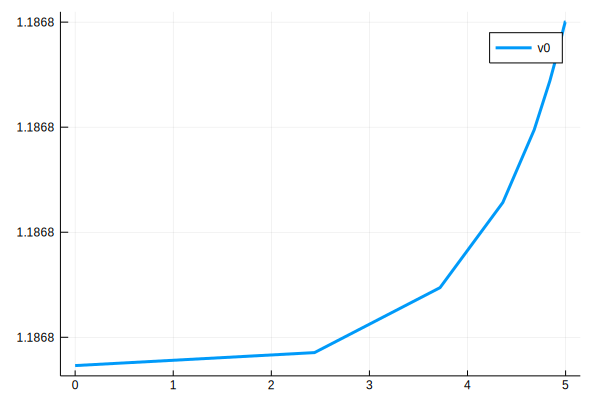

In [25]:
plot(solved.t, v0, label = "v0", lw = 3)

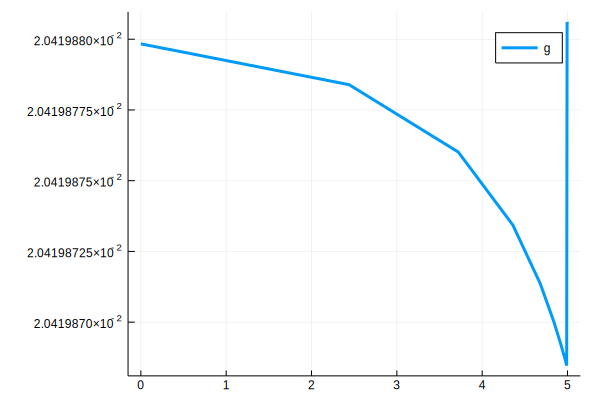

In [26]:
plot(solved.t, solved.g, label = "g", lw = 3)

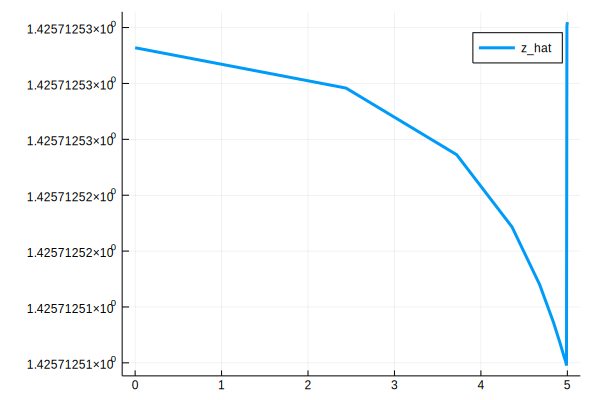

In [27]:
plot(solved.t, solved.z_hat, label = "z_hat", lw = 3)

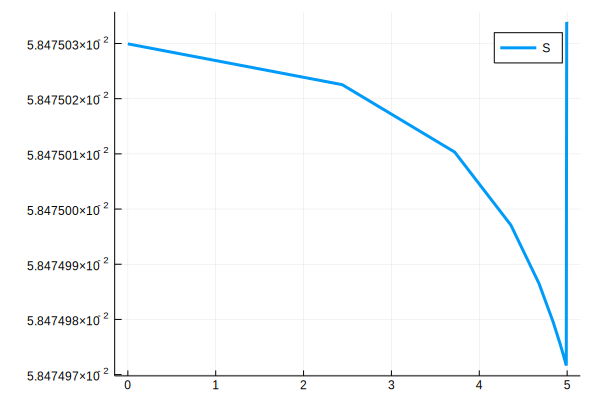

In [28]:
plot(solved.t, solved.S, label = "S", lw = 3)

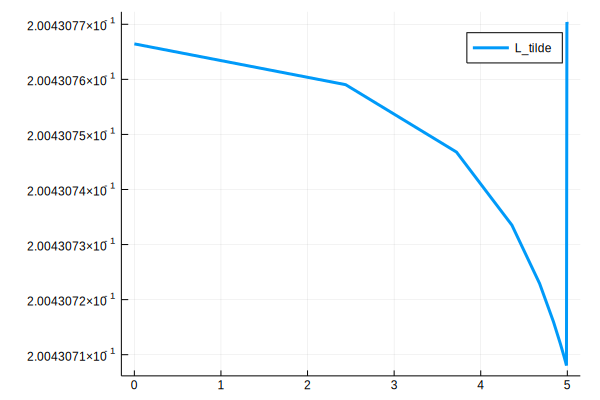

In [29]:
plot(solved.t, solved.L_tilde, label = "L_tilde", lw = 3)

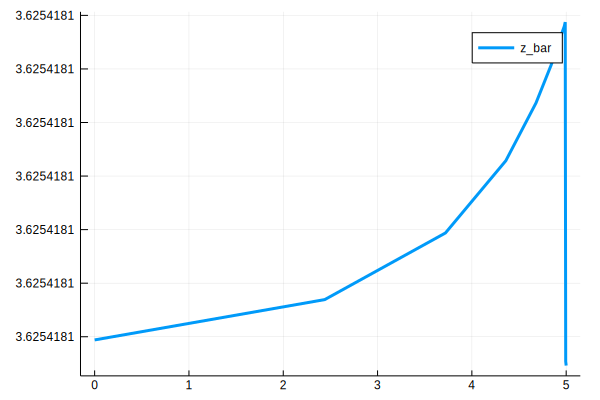

In [30]:
plot(solved.t, solved.z_bar, label = "z_bar", lw = 3)

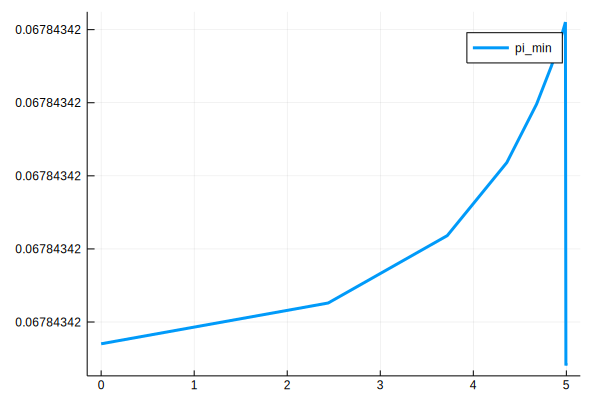

In [31]:
plot(solved.t, solved.π_min, label = "pi_min", lw = 3)

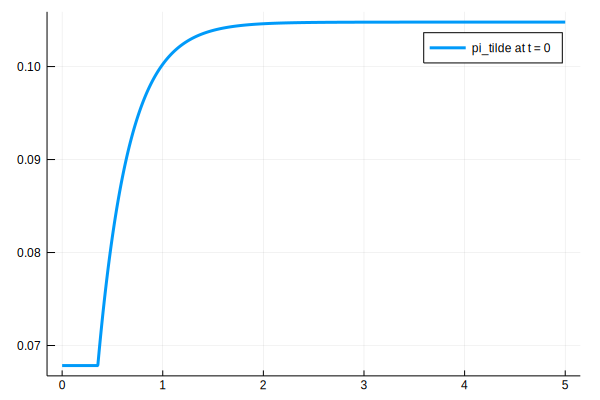

In [32]:
plot(z_grid, solved.π_tilde[1], label = "pi_tilde at t = 0", lw = 3)

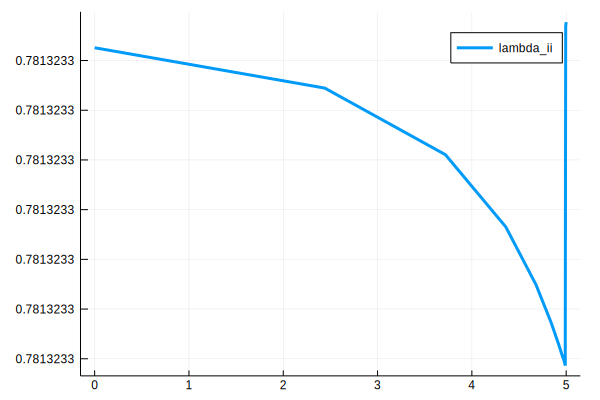

In [33]:
plot(solved.t, solved.λ_ii, label = "lambda_ii", lw = 3)

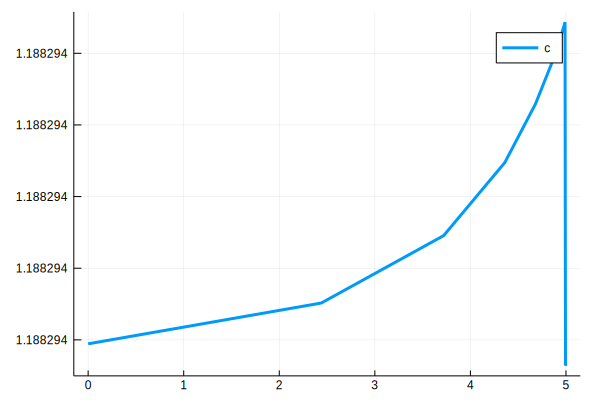

In [34]:
plot(solved.t, solved.c, label = "c", lw = 3)

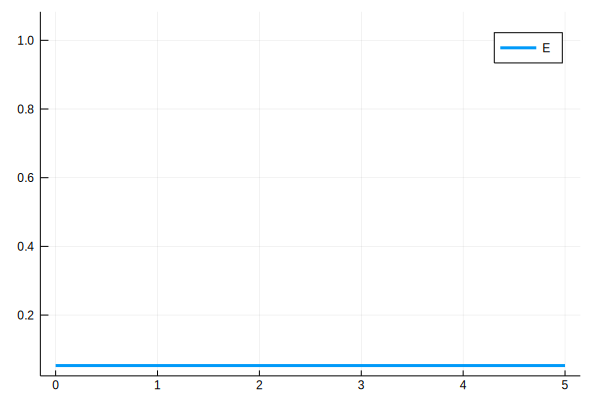

In [35]:
plot(solved.t, solved.E, label = "E", lw = 3)

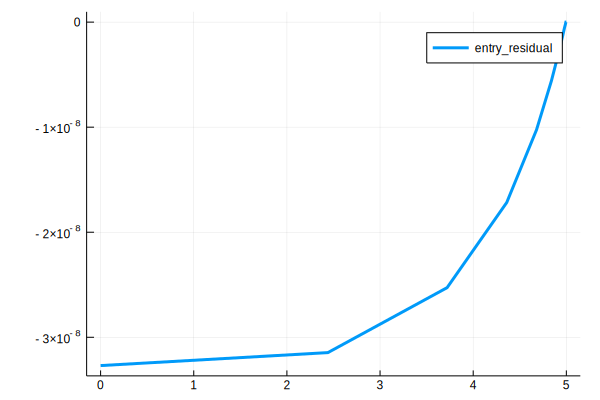

In [36]:
plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)